In [11]:
from defectlib import extract_features_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

In [12]:
features, labels, sns, images = extract_features_from_defect('./reverse/SH0402/', comb=True)
features_test, labels_test, sns_test, images_test = extract_features_from_defect('./defect_tensors_D10/SH0402/', comb=True)

features_all = np.concatenate(+(features, features_test))
labels_all = np.concatenate((labels, labels_test))
sns_all = np.concatenate((sns, sns_test))
images_all = np.concatenate((images, images_test))

there are 3 images inside SH0402_2A_c1
Processing ./reverse/SH0402/2A/SH0402_2A_c1/SH0402_Recombination_F3Y649306MGGY4TA_2A_0.jpg...
there are 1 images inside SH0402_2A_c3
Processing ./reverse/SH0402/2A/SH0402_2A_c3/SH0402_Recombination_F3Y650133M2GY4TA_2A_0.jpg...
there are 20 images inside SH0402_6A_c1
Processing ./reverse/SH0402/6A/SH0402_6A_c1/SH0402_Recombination_F3Y649306MGGY4TA_6A_0.jpg...
there are 77 images inside SH0402_6A_c3
Processing ./reverse/SH0402/6A/SH0402_6A_c3/SH0402_Recombination_F3Y649706E3GY4TA_6A_0.jpg...
there are 137 images inside SH0402_2A_c0
Processing ./defect_tensors_D10/SH0402/2A/SH0402_2A_c0/SH0402_Recombination_0_2A_0.jpg...
Processing ./defect_tensors_D10/SH0402/2A/SH0402_2A_c0/SH0402_Recombination_7_2A_15.jpg...
there are 84 images inside SH0402_2A_c1
Processing ./defect_tensors_D10/SH0402/2A/SH0402_2A_c1/SH0402_Recombination_F3Y648613F6GY4TA_2A_0.jpg...
there are 20 images inside SH0402_2A_c3
Processing ./defect_tensors_D10/SH0402/2A/SH0402_2A_c3/SH04

TypeError: bad operand type for unary +: 'tuple'

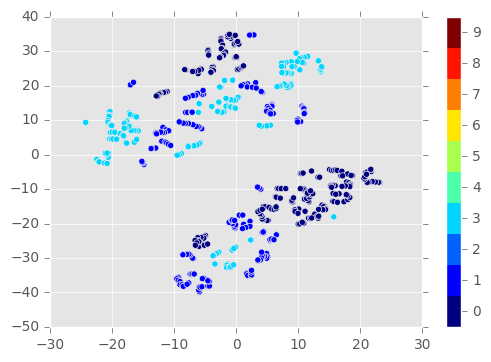

In [3]:
plot_tsne(features_all, labels_all, images_all, perplexity=30, interactive=False)

In [4]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.942029, total=   0.5s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.919708, total=   0.5s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.963235, total=   0.5s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.971014, total=   0.4s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.985401, total=   0.4s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.985294, total=   0.4s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.978261, total=   0.4s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.985401, total=   0.4s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.977941, total=   0.4s
[CV] kernel=linear, C=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   47.6s finished


Cannot save trained svm model to model.model

Best parameters set:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix:
Labels: 0,1,3

[[57  0  0]
 [ 0 40  0]
 [ 0  1 39]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
          1       0.98      1.00      0.99        40
          3       1.00      0.97      0.99        40

avg / total       0.99      0.99      0.99       137



GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [5]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [6]:
print 'test'

test


In [7]:
vis_data = bh_sne(features_all, perplexity=30)
vis_x = vis_data[:,0]
vis_y = vis_data[:,1]

vis_data_0 = vis_data[labels_all=='0']
vis_data_1 = vis_data[labels_all=='1']
vis_data_3 = vis_data[labels_all=='3']

vis_data_0_x = vis_data_0[:,0]
vis_data_0_y = vis_data_0[:,1]
vis_data_1_x = vis_data_1[:,0]
vis_data_1_y = vis_data_1[:,1]
vis_data_3_x = vis_data_3[:,0]
vis_data_3_y = vis_data_3[:,1]

In [8]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source1 = ColumnDataSource(
        data=dict(
            x=vis_data_0_x,
            y=vis_data_0_y,
            desc=sns_all[labels_all=='0'],
            imgs = images_all[labels_all=='0']

        )
    )

source2 = ColumnDataSource(
        data=dict(
            x=vis_data_1_x,
            y=vis_data_1_y,
            desc=sns_all[labels_all=='1'],
            imgs=images_all[labels_all=='1']
        )
    )

source3 = ColumnDataSource(
        data=dict(
            x=vis_data_3_x,
            y=vis_data_3_y,
            desc=sns_all[labels_all=='3'],
            imgs=images_all[labels_all=='3']
        )
    )



hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="80" alt="@imgs" width="80"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, alpha=0.5, color='green', source=source1)
p.circle('x', 'y', size=20, alpha=0.5, color='red', source=source2)
p.circle('x', 'y', size=20, alpha=0.5, color='blue', source=source3)

show(p)

In [9]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    print 'the number of S/Ns: is {}'.format(len(set(sns_in_label)))
    for sn in set(sns_in_label):
        print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 1 is 177
the number of S/Ns: is 18
	the number of S\N F3Y65050A8GGY4TB:1
	the number of S\N F3Y65050BPTGY4TB:5
	the number of S\N F3Y649303EYGY4TA:15
	the number of S\N F3Y65040838GY4TA:1
	the number of S\N F3Y648613F6GY4TA:24
	the number of S\N F3Y65050A8JGY4TB:1
	the number of S\N F3Y6492040YGY4TA:25
	the number of S\N F3Y64951QJUH3RPA:15
	the number of S\N F3Y6506021MGY4TB:1
	the number of S\N F3Y649512UGGY4TA:20
	the number of S\N F3Y649402G5GY4TA:2
	the number of S\N F3Y6504083BGY4TA:1
	the number of S\N F3Y649306MGGY4TA:4
	the number of S\N F3Y65020YVDGY4TA:9
	the number of S\N F3Y64940HE8GY4TA:6
	the number of S\N F3Y649107VBGY4TA:11
	the number of S\N F3Y64870DYRGY4TA:14
	the number of S\N F3Y64911SSEGY4TA:22
the number of class 0 is 198
the number of S/Ns: is 10
	the number of S\N 1:12
	the number of S\N 0:20
	the number of S\N 3:22
	the number of S\N 2:21
	the number of S\N 5:21
	the number of S\N 4:18
	the number of S\N 7:23
	the number of S\N 6:21
	the n